![BTS](https://github.com/vfp1/bts-dsf-2020/blob/main/Logo-BTS.jpg?raw=1)

# Assignement Week 3 and 4
### Ennio Maldonado

In [143]:
# Preliminaries

# Imports

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import sqlite3
import seaborn as sns

# PANDAS

## Groupby exersises

Import this [dataset](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user)

*   What is the mean age per occupation?
*   What is the male ratio per occupation, sort it from the most to the least. Do the same for women
*   For each occupation, calculate the minimum and maximum ages
* For each combination of occupation and gender, calculate the mean age
* For each occupation present the percentage of women and men



In [4]:
url = r"https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
occupation = pd.read_csv(url, sep='|')
occupation.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [6]:
# What is the mean age per occupation?
occupation.groupby('occupation').age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [16]:
# What is the male ratio per occupation, sort it from the most to the least. Do the same for women
# Lambda function for men
occupation['gender_n'] = occupation['gender'].apply(lambda x: 1 if x == 'M' else (0 if x == 'F' else None))
males = occupation.groupby('occupation').gender_n.sum() / occupation.occupation.value_counts() 
# sort to the most male 
males.sort_values(ascending = False)

doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64

In [18]:
# Lambda function for women
occupation['gender_n'] = occupation['gender'].apply(lambda x: 0 if x == 'M' else (1 if x == 'F' else None))
women = occupation.groupby('occupation').gender_n.sum() / occupation.occupation.value_counts() 
# sort to the most male 
women.sort_values(ascending = False)

homemaker        0.857143
healthcare       0.687500
librarian        0.568627
artist           0.464286
administrator    0.455696
none             0.444444
writer           0.422222
marketing        0.384615
other            0.342857
student          0.306122
educator         0.273684
salesman         0.250000
lawyer           0.166667
entertainment    0.111111
scientist        0.096774
executive        0.093750
programmer       0.090909
retired          0.071429
technician       0.037037
engineer         0.029851
doctor           0.000000
dtype: float64

In [19]:
# For each occupation, calculate the minimum and maximum ages
occupation.groupby('occupation').age.agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [21]:
# For each combination of occupation and gender, calculate the mean age
occupation.groupby(['occupation', 'gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [26]:
# For each occupation present the percentage of women and men
gender_ocup = occupation.groupby(['occupation', 'gender']).agg({'gender': 'count'}) / occupation.groupby(['occupation']).agg('count') *100
gender_ocup.gender

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

## Apply exercises

Import this [dataset](https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/US_Crime_Rates_1960_2014.csv)

* What is the type of the columns?
* Convert the type of the column Year to datetime64
* Set the Year column as the index of the dataframe
* Delete the Total column
* Group the year by decades and sum the values (take care with population values) 
* What is the most dangerous decade to live in the US?


In [51]:
url = r"https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/US_Crime_Rates_1960_2014.csv"

crime = pd.read_csv(url, parse_dates=['Year'], index_col='Year')

crime.head()

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960-01-01,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [52]:
# What is the type of the columns?
crime.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55 entries, 1960-01-01 to 2014-01-01
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Population          55 non-null     int64
 1   Total               55 non-null     int64
 2   Violent             55 non-null     int64
 3   Property            55 non-null     int64
 4   Murder              55 non-null     int64
 5   Forcible_Rape       55 non-null     int64
 6   Robbery             55 non-null     int64
 7   Aggravated_assault  55 non-null     int64
 8   Burglary            55 non-null     int64
 9   Larceny_Theft       55 non-null     int64
 10  Vehicle_Theft       55 non-null     int64
dtypes: int64(11)
memory usage: 5.2 KB


In [53]:
# Convert the type of the column Year to datetime64
type(crime.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [54]:
# Set the Year column as the index of the dataframe
# Done in one

In [55]:
# Delete the Total column
crime.drop(['Total'], axis=1, inplace=True)

In [56]:
crime.head()

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-01-01,179323175,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,185771000,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,188483000,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,191141000,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [58]:
# Group the year by decades and sum the values (take care with population values)
crimes = crime.resample('10Y').sum()
crimes.head(10)

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-12-31,179323175,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1970-12-31,1938965298,4585290,49424400,113070,257520,1875530,2339170,14614000,28918100,5892300
1980-12-31,2143307264,10213630,96088300,199270,599570,4375000,5039800,30076200,56068900,9943200
1990-12-31,2394730678,14549938,117640700,206839,885209,5456539,8001340,32352194,72849053,12439611
2000-12-31,2645537291,17132404,116580585,203810,986445,5517676,10425809,25727107,76705256,14148520
2010-12-31,2975877430,13793818,99874408,162254,917914,4191439,8522262,21682641,67203302,10992397
2020-12-31,1260816088,4820769,34983325,58095,335466,1380720,2982298,7956713,24197097,2829515


In [62]:
# What is the most dangerous decade to live in the US?
crime.idxmax(0)

Population           2014-01-01
Violent              1992-01-01
Property             1991-01-01
Murder               1991-01-01
Forcible_Rape        1992-01-01
Robbery              1991-01-01
Aggravated_assault   1993-01-01
Burglary             1980-01-01
Larceny_Theft        1991-01-01
Vehicle_Theft        1991-01-01
dtype: datetime64[ns]

# SQLite and Pandas

## SQLite, Pandas and the world of tips

Given [this](https://github.com/vfp1/bts-dsf-2020/blob/main/data/tips.csv) CSV file. Do the following:

* Load it in Pandas
* Save the `DataFrame` as SQLite
* Reply the following questions by slicing the SQLite database with SQL queries and then using Pandas for analysis:
    * Who is most likely to receive a tip during weekday? A Female or a Male? 
        * And during weekends?
    * What is the table size that is most likely to bring a better tip?
    * Who are giving more tips, smokers or non smokers? 

In [63]:
url = 'https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/tips.csv'

tips = pd.read_csv(url)
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [67]:
cnx = sqlite3.connect('tips.db')
tips.to_sql(name='tips', con=cnx)

In [68]:
def create_connect_database(db_name):
    """Opens connection or creates it if it is not existent"""
    connection = sqlite3.connect(db_name)
    cursor = connection.cursor()
    
    return connection, cursor

def commit_close(conn, c, close_connection=True):
    """Commits to connection DB and closes it if close is True"""
    conn.commit()

    if close_connection is True:
        c.close()
        conn.close()
    elif close_connection is False:
        pass

In [76]:
# Who is most likely to receive a tip during weekday? A Female or a Male?

conn, cursor = create_connect_database("tips.db")

query = """
SELECT 
    day,
    sex,
    COUNT(*)
FROM tips
GROUP BY 
    day,
    sex;
"""

df = pd.read_sql_query(query, conn)
df

,day,sex,COUNT(*)
0,Fri,Female,9
1,Fri,Male,10
2,Sat,Female,28
3,Sat,Male,59
4,Sun,Female,18
5,Sun,Male,58
6,Thur,Female,32
7,Thur,Male,30


In [71]:
# And during weekends?
query = '''
SELECT
    sex,
    CASE 
        WHEN (day != 'Sat') and (day != 'Sun') THEN 'weekday' 
        ELSE 'weekend' 
        END AS weekday_weekend,
        count(tip) 
FROM tips 
GROUP BY 
    sex,
    CASE                
        WHEN (day != 'Sat') and (day != 'Sun') THEN 'weekday' 
        ELSE 'weekend' 
        END 
''' 
df = pd.read_sql_query(query, conn)
df

,sex,weekday_weekend,count(tip)
0,Female,weekday,41
1,Female,weekend,46
2,Male,weekday,40
3,Male,weekend,117


In [75]:
# What is the table size that is most likely to bring a better tip?

query = """
SELECT 
    size,
    AVG(tip),
    COUNT(*)
FROM tips
GROUP BY 
    size;
"""

df = pd.read_sql_query(query, conn)
df

,size,AVG(tip),COUNT(*)
0,1,1.437500,4
1,2,2.582308,156
2,3,3.393158,38
3,4,4.135405,37
4,5,4.028000,5
5,6,5.225000,4


In [74]:
# Who are giving more tips, smokers or non smokers?

query = """
SELECT 
    smoker,
    AVG(tip),
    COUNT(*)
FROM tips
GROUP BY 
    smoker;
"""

df = pd.read_sql_query(query, conn)
df

,smoker,AVG(tip),COUNT(*)
0,No,2.991854,151
1,Yes,3.008710,93


## More airports

For extra points, plot the routs of incoming/outgoing destinations using Geopandas
 

Download [this Sqlite database](https://github.com/vfp1/bts-dsf-2020/raw/main/data/flights.db)

Using SQLite database reply the following questions:

*   Which is the country that has the least amount of active airlines?
*   And which is the country that has the most amount of active airlines?
*   Which is the country that has more airports?
*   And the country with the least airports?
*   Which country has the most outgoing destinations? And the least?
*   And which country has the most incoming destinations? And the least?



In [78]:
connection, cursor = create_connect_database('flights.db')

In [90]:
# Which is the country that has the least amount of active airlines?
query = """
SELECT 
    country,
    count(*) as num_air
FROM 
    airlines 
GROUP BY country
HAVING
    active=='Y'
ORDER BY num_air ASC;
"""

df = pd.read_sql_query(query, connection)
df.head(5)

,country,num_air
0,S.A.,1
1,ALASKA,1
2,AVIANCA,1
3,American Samoa,1
4,Bhutan,1


In [91]:
# And which is the country that has the most amount of active airlines?
query = """
SELECT 
    country,
    count(*) as num_air
FROM 
    airlines 
GROUP BY country
HAVING
    active=='Y'
ORDER BY num_air DESC;
"""

df = pd.read_sql_query(query, connection)
df.head(5)

,country,num_air
0,France,119
1,Australia,93
2,South Africa,91
3,Italy,90
4,Switzerland,60


In [92]:
# Which is the country that has more airports?
query = """
SELECT 
    country,
    count(*) as num_air
FROM 
    airports 
GROUP BY country
ORDER BY num_air DESC;
"""

df = pd.read_sql_query(query, connection)
df.head(5)

,country,num_air
0,United States,1697
1,Canada,435
2,Germany,321
3,Australia,263
4,Russia,249


In [93]:
# And the country with the least airports?
query = """
SELECT 
    country,
    count(*) as num_air
FROM 
    airports 
GROUP BY country
ORDER BY num_air ASC;
"""

df = pd.read_sql_query(query, connection)
df.head(5)

,country,num_air
0,Albania,1
1,Anguilla,1
2,Aruba,1
3,Barbados,1
4,Benin,1


In [109]:
# Which country has the most outgoing destinations? 
query = """
SELECT
    CAST(source_air.country AS TEXT) AS source_country, 
    CAST(destination_air.country AS TEXT) AS destination_country,
    count(*) as num_dest
FROM routes 
INNER JOIN 
    airports source_air ON 
    source_air.id = routes.source_id 
INNER JOIN 
    airports destination_air ON 
    destination_air.id = routes.dest_id
GROUP BY source_country
ORDER BY num_dest DESC;

"""

df = pd.read_sql_query(query, connection)
df.head(5)

,source_country,destination_country,num_dest
0,United States,United States,13178
1,China,Singapore,8146
2,United Kingdom,Switzerland,2661
3,Spain,Switzerland,2530
4,Germany,Switzerland,2353


In [111]:
# And the least?
query = """
SELECT
    CAST(source_air.country AS TEXT) AS source_country, 
    CAST(destination_air.country AS TEXT) AS destination_country,
    count(*) as num_dest
FROM routes 
INNER JOIN 
    airports source_air ON 
    source_air.id = routes.source_id 
INNER JOIN 
    airports destination_air ON 
    destination_air.id = routes.dest_id
GROUP BY source_country
ORDER BY num_dest ASC;

"""

df = pd.read_sql_query(query, connection)
df.head(5)

,source_country,destination_country,num_dest
0,American Samoa,United States,1
1,Cocos (Keeling) Islands,Christmas Island,1
2,Falkland Islands,Chile,1
3,Lesotho,South Africa,1
4,Monaco,France,1


In [117]:
# And which country has the most incoming destinations? 
query = """
SELECT
    CAST(source_air.country AS TEXT) AS source_country, 
    CAST(destination_air.country AS TEXT) AS destination_country,
    count(*) as num_inc
FROM routes 
INNER JOIN 
    airports source_air ON 
    source_air.id = routes.source_id 
INNER JOIN 
    airports destination_air ON 
    destination_air.id = routes.dest_id
GROUP BY destination_country
ORDER BY num_inc DESC;

"""

df = pd.read_sql_query(query, connection)
df.head(5)

,source_country,destination_country,num_inc
0,United States,United States,13173
1,Singapore,China,8146
2,Switzerland,United Kingdom,2635
3,Switzerland,Spain,2533
4,Germany,Germany,2337


In [118]:
# And the least?

query = """
SELECT
    CAST(source_air.country AS TEXT) AS source_country, 
    CAST(destination_air.country AS TEXT) AS destination_country,
    count(*) as num_inc
FROM routes 
INNER JOIN 
    airports source_air ON 
    source_air.id = routes.source_id 
INNER JOIN 
    airports destination_air ON 
    destination_air.id = routes.dest_id
GROUP BY destination_country
ORDER BY num_inc ASC;

"""

df = pd.read_sql_query(query, connection)
df.head(5)

,source_country,destination_country,num_inc
0,United States,American Samoa,1
1,Christmas Island,Cocos (Keeling) Islands,1
2,Argentina,Falkland Islands,1
3,South Africa,Lesotho,1
4,France,Monaco,1


# Kaggle Titanic

Your first Kaggle challenge! 

Retrieve the csv (train) file from [this Kaggle challenge](https://www.kaggle.com/c/titanic/data?select=train.csv)

Either here or through a Kaggle notebook (you will need to submit then this notebook with the rest of exercises and the Kaggle notebook).

Reply to the following questions:



1.   How many men and women survived?
2.   What was the age group that had a higher survival chance? You can divide age groups in groups of 10 years
3. Which port of embarkation had most of the survivors? And which less?
4. Which ticket class had most of the survivors? And which less?
5. Could you compare the ticket fare with the survival? Did more expensive tickets had higher chance of surviving?



In [121]:
file = r"train.csv"

titanic = pd.read_csv(file, index_col='PassengerId')

titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [125]:
# How many men and women survived?
print(f"The total number of survivors is: {titanic[titanic['Survived']==1].sum().Survived}")

The total number of survivors is: 342


In [135]:
# What was the age group that had a higher survival chance? You can divide age groups in groups of 10 years
titanic['bin'] =  pd.cut(titanic['Age'], [0,10,20,30,40,50,60,70,80,90,100,110])

titanic.groupby('bin').count().Survived.sort_values(ascending=False)

bin
(20, 30]      230
(30, 40]      155
(10, 20]      115
(40, 50]       86
(0, 10]        64
(50, 60]       42
(60, 70]       17
(70, 80]        5
(100, 110]      0
(90, 100]       0
(80, 90]        0
Name: Survived, dtype: int64

In [136]:
# Which port of embarkation had most of the survivors? And which less?
titanic.groupby('Embarked').count().Survived.sort_values(ascending=False)

Embarked
S    644
C    168
Q     77
Name: Survived, dtype: int64

In [137]:
# Which ticket class had most of the survivors? And which less?
titanic.groupby('Pclass').count().Survived.sort_values(ascending=False)

Pclass
3    491
1    216
2    184
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

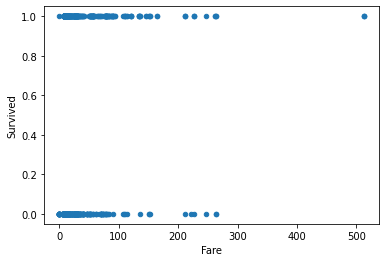

In [141]:
# Could you compare the ticket fare with the survival? Did more expensive tickets had higher chance of surviving?
titanic[['Fare','Survived']].plot(kind='scatter',x='Fare', y='Survived')

<AxesSubplot:>

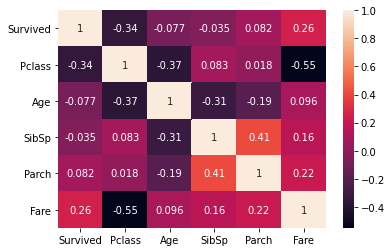

In [147]:
sns.heatmap(titanic.corr(), annot = True, fmt='.2g',cmap= 'rocket')

In [ ]:
# There seems to be some small correlation or survival with passenger class and fare.